<a href="https://colab.research.google.com/github/devroopsaha744/MLCOE-TASK-2/blob/main/MLCOE_Task_2_Classification_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
#importing all the libraries that are required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2

In [120]:
!pip install imbalanced-learn

In [121]:
df = pd.read_csv("/content/singaporeclassif.csv")

##  **Data Collection**

In [122]:
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,good,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,poor,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 SGD,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 SGD,30,good,car,3857,< 100 SGD,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 SGD,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 SGD,45,good,furniture/appliances,1845,< 100 SGD,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [123]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [124]:
df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [125]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

No missing values

In [126]:
df.shape

(1000, 17)

## **Exploratory Data Analysis**

In [127]:
#understanding the target variable
df['default'].value_counts()

no     700
yes    300
Name: default, dtype: int64

class imbalance present. Accuracy won't be THAT correct of a metric.

In [128]:
#Analyzing the 'checking_balance' column
df['checking_balance'].value_counts()

unknown        394
< 0 SGD        274
1 - 200 SGD    269
> 200 SGD       63
Name: checking_balance, dtype: int64

In [129]:
ct1 = pd.crosstab(df['checking_balance'], df['default'], normalize = 'index')
ct1*100

default,no,yes
checking_balance,,
1 - 200 SGD,60.966543,39.033457
< 0 SGD,50.729927,49.270073
> 200 SGD,77.777778,22.222222
unknown,88.324873,11.675127


<Axes: xlabel='months_loan_duration'>

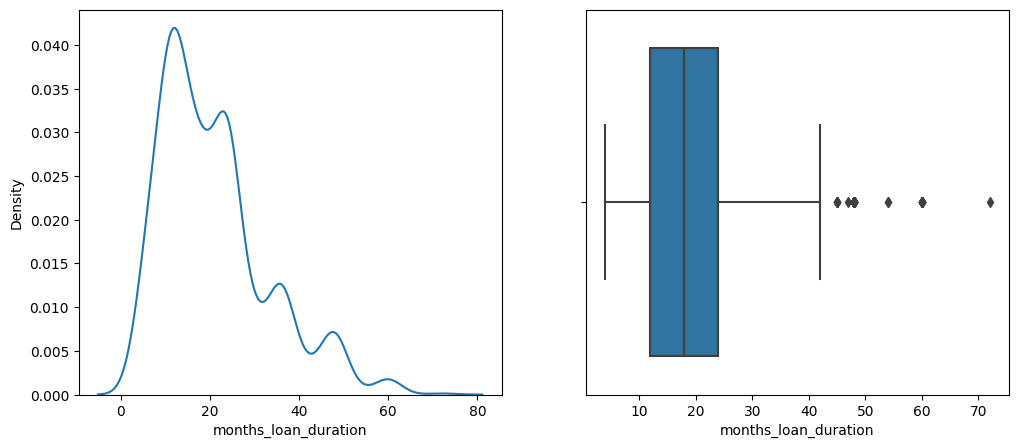

In [130]:
#Analysing the months loan duration column
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.kdeplot(x = 'months_loan_duration', data = df, ax = axes[0])
sns.boxplot(x = 'months_loan_duration', data = df, ax = axes[1])

In [131]:
loan = df.groupby('default')['months_loan_duration'].mean().reset_index()
loan

,default,months_loan_duration
0,no,19.207143
1,yes,24.860000


those people are given loan who have 24 months loan duration on an average

In [132]:
#analysing credit history column
ct2 = pd.crosstab(df['credit_history'], df['default'], normalize = 'index')
ct2*100

default,no,yes
credit_history,,
critical,82.935154,17.064846
good,68.113208,31.886792
perfect,37.500000,62.500000
poor,68.181818,31.818182
very good,42.857143,57.142857


In [133]:
df['credit_history'].value_counts()

good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64

In [134]:
df['purpose'].value_counts()

furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64

In [135]:
#replace 'car0' values with 'car' (maybe an data entry error)
df['purpose'] = df['purpose'].replace('car0', 'car')

In [136]:
#Analysing the purpose column
ct3 = pd.crosstab(df['purpose'], df['default'], normalize = 'index')
ct3*100

default,no,yes
purpose,,
business,64.948454,35.051546
car,68.194842,31.805158
education,61.016949,38.983051
furniture/appliances,73.784355,26.215645
renovations,63.636364,36.363636


<Axes: xlabel='amount'>

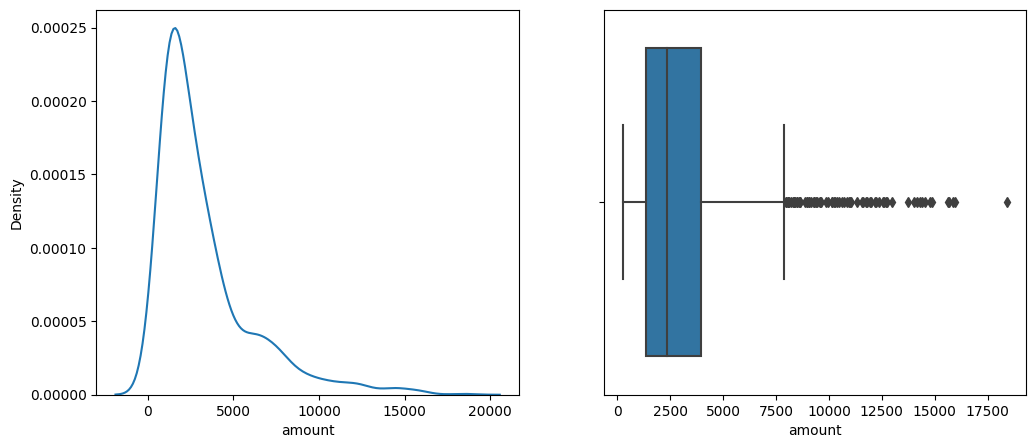

In [137]:
#Analysing the amount column
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.kdeplot(x = 'amount', data = df, ax = axes[0])
sns.boxplot(x = 'amount', data = df, ax = axes[1])

Left skewed distribution

In [138]:
amnt = df.groupby('default')['amount'].mean().reset_index()
amnt

,default,amount
0,no,2985.457143
1,yes,3938.126667


People who are given loan are  given higher amount on an average

In [139]:
#Analyzing the 'savings_balance' column
df['savings_balance'].value_counts()

< 100 SGD         603
unknown           183
100 - 500 SGD     103
500 - 1000 SGD     63
> 1000 SGD         48
Name: savings_balance, dtype: int64

In [140]:
#Analysing the purpose column
ct4 = pd.crosstab(df['purpose'], df['default'], normalize = 'index')
ct4*100

default,no,yes
purpose,,
business,64.948454,35.051546
car,68.194842,31.805158
education,61.016949,38.983051
furniture/appliances,73.784355,26.215645
renovations,63.636364,36.363636


In [141]:
#Analyzing the 'employement duration' column
df['employment_duration'].value_counts()

1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64

In [142]:
#Analysing the employement duration column
ct5 = pd.crosstab(df['employment_duration'], df['default'], normalize = 'index')
ct5*100

default,no,yes
employment_duration,,
1 - 4 years,69.321534,30.678466
4 - 7 years,77.586207,22.413793
< 1 year,59.302326,40.697674
> 7 years,74.703557,25.296443
unemployed,62.903226,37.096774


In [143]:
#Analyzing the 'percent of income' column
df['percent_of_income'].value_counts()

4    476
2    231
3    157
1    136
Name: percent_of_income, dtype: int64

In [144]:
#Analysing the employement duration column
ct6 = pd.crosstab(df['percent_of_income'], df['default'], normalize = 'index')
ct6*100

default,no,yes
percent_of_income,,
1,75.000000,25.000000
2,73.160173,26.839827
3,71.337580,28.662420
4,66.596639,33.403361


In [145]:
#Analyzing the 'years at residence' column
df['years_at_residence'].value_counts()

4    413
2    308
3    149
1    130
Name: years_at_residence, dtype: int64

In [146]:
#Analysing the years at residence column
ct7 = pd.crosstab(df['years_at_residence'], df['default'], normalize = 'index')
ct7*100

default,no,yes
years_at_residence,,
1,72.307692,27.692308
2,68.506494,31.493506
3,71.140940,28.859060
4,69.975787,30.024213


In [147]:
#Analyzing the 'other_credit' column
print(df['other_credit'].value_counts())

print("\n")
ct8 = pd.crosstab(df['other_credit'], df['default'], normalize = 'index')
ct8*100

none     814
bank     139
store     47
Name: other_credit, dtype: int64




default,no,yes
other_credit,,
bank,58.992806,41.007194
none,72.481572,27.518428
store,59.574468,40.425532


In [148]:
#Analyzing the 'existing_loans_count' column
print(df['existing_loans_count'].value_counts())

print("\n")
ct9 = pd.crosstab(df['existing_loans_count'], df['default'], normalize = 'index')
ct9*100

1    633
2    333
3     28
4      6
Name: existing_loans_count, dtype: int64




default,no,yes
existing_loans_count,,
1,68.404423,31.595577
2,72.372372,27.627628
3,78.571429,21.428571
4,66.666667,33.333333


In [149]:
#Analyzing ghe 'housing' column
print(df['housing'].value_counts())

print("\n")
ct9 = pd.crosstab(df['housing'], df['default'], normalize = 'index')
ct9*100

own      713
rent     179
other    108
Name: housing, dtype: int64




default,no,yes
housing,,
other,59.259259,40.740741
own,73.913043,26.086957
rent,60.893855,39.106145


In [150]:
#Analyzing ghe 'job' column
print(df['job'].value_counts())

print("\n")
ct11 = pd.crosstab(df['job'], df['default'], normalize = 'index')
ct11*100

skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64




default,no,yes
job,,
management,65.540541,34.459459
skilled,70.476190,29.523810
unemployed,68.181818,31.818182
unskilled,72.000000,28.000000


In [151]:
#Analyzing ghe 'dependents' column
print(df['dependents'].value_counts())

print("\n")
ct12 = pd.crosstab(df['dependents'], df['default'], normalize = 'index')
ct12*100

1    845
2    155
Name: dependents, dtype: int64




default,no,yes
dependents,,
1,69.940828,30.059172
2,70.322581,29.677419


In [152]:
#Analyzing ghe 'phone' column
print(df['phone'].value_counts())

print("\n")
ct13 = pd.crosstab(df['phone'], df['default'], normalize = 'index')
ct13*100

no     596
yes    404
Name: phone, dtype: int64




default,no,yes
phone,,
no,68.624161,31.375839
yes,72.029703,27.970297


<Axes: xlabel='age'>

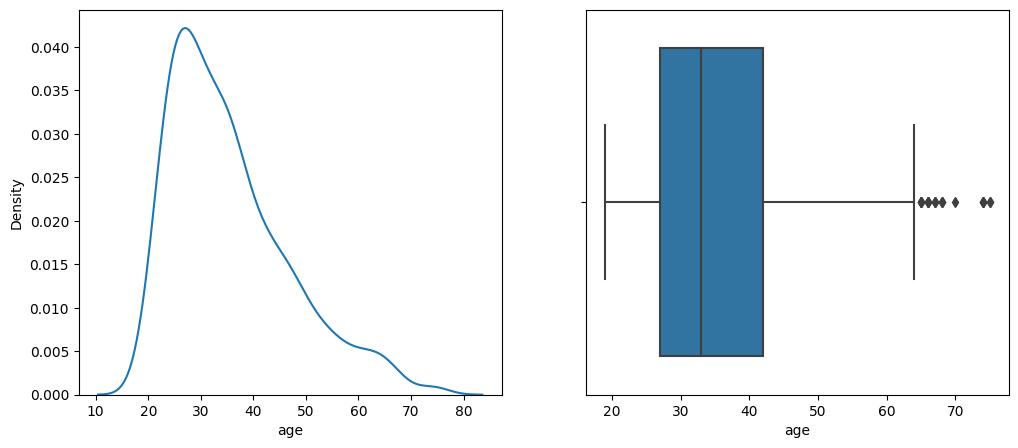

In [153]:
#Analysing the age column
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.kdeplot(x = 'age', data = df, ax = axes[0])
sns.boxplot(x = 'age', data = df, ax = axes[1])

In [154]:
age = df.groupby('default')['age'].mean().reset_index()
age

,default,age
0,no,36.224286
1,yes,33.963333


No significant correlations.

## **Data Preprocessing**

In [155]:
#encoding credit_history
df['credit_history'] = df['credit_history'].replace('critical', 1)
df['credit_history'] = df['credit_history'].replace('poor', 2)
df['credit_history'] = df['credit_history'].replace('good', 3)
df['credit_history'] = df['credit_history'].replace('very good', 4)
df['credit_history'] = df['credit_history'].replace('perfect', 5)

df['credit_history'] = pd.to_numeric(df['credit_history'])

In [156]:
#encoding the default variable
df['default'] = np.where(df['default']=='yes',1,0)

<ipython-input-157-ea7e16a180a7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

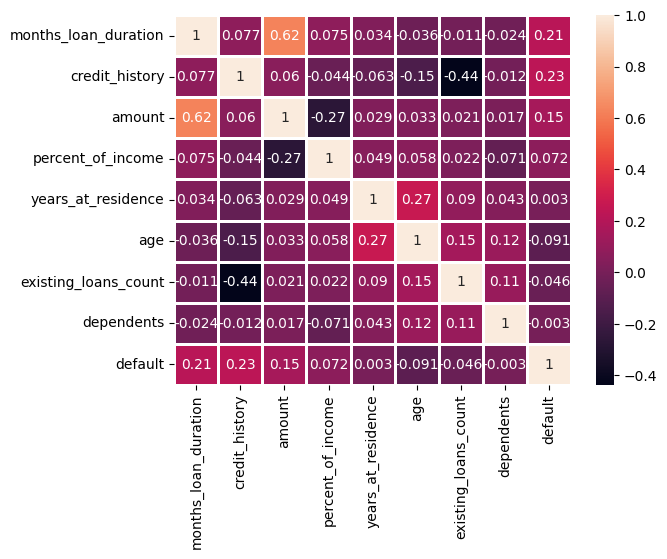

In [157]:
#correlation analysis
corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 0.75)

Above graph analyses the correaltion between the independent varibales and with the target variable.

In [158]:
#df.drop(['dependents', 'years_at_residence', 'age', 'percent_of_income'], axis = 1)
#dropping features on the basis of correlation with the target variable and multicollinearity between amount and months_loan_duration

In [159]:
#one hot encoding the nominal variables
df = pd.get_dummies(df, drop_first = True)

In [160]:
df

,months_loan_duration,credit_history,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_< 0 SGD,...,employment_duration_> 7 years,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_yes
0,6,1,1169,4,4,67,2,1,0,1,...,1,0,1,0,1,0,1,0,0,1
1,48,3,5951,2,2,22,1,1,1,0,...,0,0,1,0,1,0,1,0,0,0
2,12,1,2096,2,3,49,1,2,0,0,...,0,0,1,0,1,0,0,0,1,0
3,42,3,7882,2,4,45,1,2,0,1,...,0,0,1,0,0,0,1,0,0,0
4,24,2,4870,3,4,53,2,2,1,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,3,1736,3,4,31,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
996,30,3,3857,4,4,40,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
997,12,3,804,4,4,38,1,1,0,0,...,1,0,1,0,1,0,1,0,0,0
998,45,3,1845,4,4,23,1,1,1,1,...,0,0,1,0,0,0,1,0,0,1


In [161]:
#outlier removal and detection
iqr1 = df['age'].quantile(q=0.75) - df['age'].quantile(q=0.25)
iqr2 = df['amount'].quantile(q=0.75) - df['amount'].quantile(q=0.25)
iqr3 = df['months_loan_duration'].quantile(q=0.75) - df['months_loan_duration'].quantile(q=0.25)

u1 = df['age'].quantile(q=0.75) + 1.5*iqr1
u2 = df['amount'].quantile(q=0.75) + 1.5*iqr2
u3 = df['months_loan_duration'].quantile(q=0.75) + 1.5*iqr3

l1 = df['age'].quantile(q=0.75) - 1.5*iqr1
l2 = df['amount'].quantile(q=0.75) - 1.5*iqr2
l3 = df['months_loan_duration'].quantile(q=0.75) - 1.5*iqr3

#capping the outliers (of numerical varaibles)
df['age'] = np.where(df['age']>u1,u1,np.where(df['age']<l1,l1,df['age']))
df['amount'] = np.where(df['amount']>u2,u2,np.where(df['amount']<l2,l2,df['amount']))
df['months_loan_duration'] = np.where(df['months_loan_duration']>u3,u3,np.where(df['months_loan_duration']<l3,l3,df['months_loan_duration']))

In [162]:
#feature scaling
scl = MinMaxScaler()
scl_df = scl.fit_transform(df)
scl_df = pd.DataFrame(scl_df, columns = df.columns)

In [163]:
scl_df

,months_loan_duration,credit_history,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_< 0 SGD,...,employment_duration_> 7 years,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_yes
0,0.000000,0.00,0.120408,1.000000,1.000000,1.000000,0.333333,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.000000,0.50,0.746950,0.333333,0.333333,0.055556,0.000000,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.166667,0.00,0.241864,0.333333,0.666667,0.655556,0.000000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.000000,0.50,0.999951,0.333333,1.000000,0.566667,0.000000,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.500000,0.25,0.605316,0.666667,1.000000,0.744444,0.333333,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.166667,0.50,0.194697,0.666667,1.000000,0.255556,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
996,0.666667,0.50,0.472592,1.000000,1.000000,0.455556,0.000000,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
997,0.166667,0.50,0.072586,1.000000,1.000000,0.411111,0.000000,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
998,1.000000,0.50,0.208978,1.000000,1.000000,0.077778,0.000000,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [164]:
#splitting the target variable
x = scl_df.drop(['default'], axis =1)
y = scl_df['default']

In [165]:
#feature selection using chi2
k=10
select = SelectKBest(chi2, k=k)
x_new = select.fit_transform(x,y)

selected_feature_indices = select.get_support(indices=True)
selected_features = x.columns[selected_feature_indices]
print("Selected features:", selected_features)

Selected features: Index(['months_loan_duration', 'credit_history', 'checking_balance_< 0 SGD',
       'checking_balance_unknown', 'savings_balance_< 100 SGD',
       'savings_balance_> 1000 SGD', 'savings_balance_unknown',
       'employment_duration_< 1 year', 'housing_own', 'housing_rent'],
      dtype='object')


In [166]:
x = x[['months_loan_duration', 'credit_history', 'checking_balance_< 0 SGD',
       'checking_balance_unknown', 'savings_balance_< 100 SGD',
       'savings_balance_> 1000 SGD', 'savings_balance_unknown',
       'employment_duration_< 1 year', 'housing_own', 'housing_rent']]

## **Model Developement**

In [167]:
#train test split
x_train, x_test,  y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 100)

clf = LogisticRegression(C = 1, penalty = 'l2', max_iter = 100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [168]:
#hyperparameter tuning
parameters = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 500, 1000],
}
grid_search = GridSearchCV(estimator = clf, param_grid = parameters, cv = 5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print(best_params)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


## **Model Evaluation**

In [169]:
#using different evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy score is(test_set): ",accuracy)


recall= recall_score(y_test, y_pred)
print("The recall score is: ",recall)

precision= precision_score(y_test, y_pred)
print("The precision score is: ",precision)


f1= f1_score(y_test, y_pred)
print("The f1 score is: ",f1)



The accuracy score is(test_set):  0.744
The recall score is:  0.323943661971831
The precision score is:  0.5897435897435898
The f1 score is:  0.4181818181818182


Text(50.722222222222214, 0.5, 'actual values')

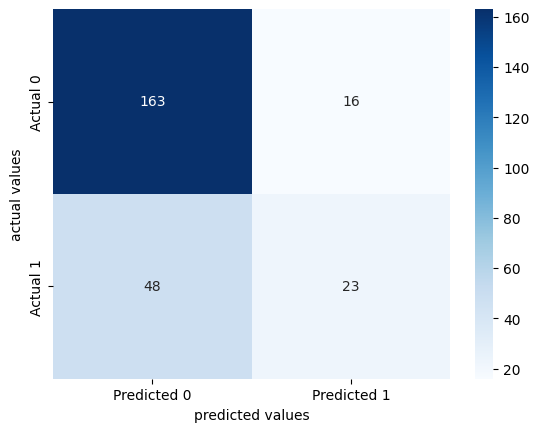

In [170]:
#confusion matrix on a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("predicted values")
plt.ylabel("actual values")

## **model improvement**

There is scope of improvement in model as firstly, there is class imbalance so, accuracy is not the correct metric. So we will perform resampling to reduce class imbalance then fit it to the model and judge the model on the basis of otehr metrics like recall and precision.


In [171]:
#Using resampling techniques to handle imbalanced nature
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_res, y_res = rus.fit_resample(x, y)
#Performing undersampling

In [172]:
#train test split in resmapled data
x1_train, x1_test,  y1_train, y1_test = train_test_split(x_res,y_res, test_size = 0.25, random_state = 100)

clf = LogisticRegression(C = 0.01, penalty = 'l2', max_iter = 100)
clf.fit(x1_train, y1_train)
y1_pred = clf.predict(x1_test)

In [173]:
#hyperparameter tuning in resampled data
parameters = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 500, 1000],
}
grid_search = GridSearchCV(estimator = clf, param_grid = parameters, cv = 5)
grid_search.fit(x1_train, y1_train)

best_params = grid_search.best_params_
print(best_params)

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2'}


In [174]:
#using different evaluation metrics (in resampled data)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy score is(test_set) in resampled data: ",accuracy)


recall= recall_score(y1_test, y1_pred)
print("The recall score is in resampled data: ",recall)

precision= precision_score(y1_test, y1_pred)
print("The precision score is in resampled data: ",precision)


f1= f1_score(y1_test, y1_pred)
print("The f1 score is in resampled data: ",f1)

The accuracy score is(test_set) in resampled data:  0.744
The recall score is in resampled data:  0.7012987012987013
The precision score is in resampled data:  0.6835443037974683
The f1 score is in resampled data:  0.6923076923076923


Text(50.722222222222214, 0.5, 'actual values')

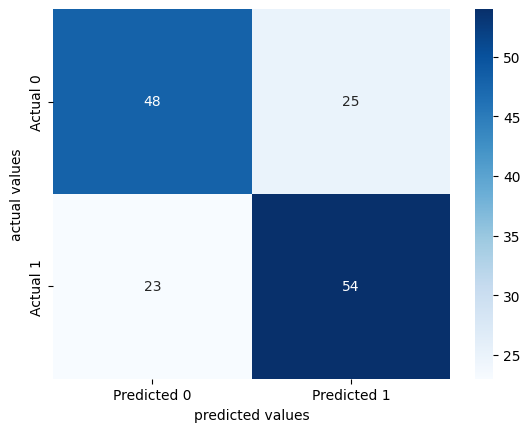

In [175]:
#confusion matrix on a heatmap (for the resampled data)
conf_matrix = confusion_matrix(y1_test, y1_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("predicted values")
plt.ylabel("actual values")

This above analysis done to improve the recall score as the data was imbalanced.